<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/aayushi_ads_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS LAB 6**

Dataset : [link](https://www.kaggle.com/code/caesarmario/listen-to-your-heart-a-disease-prediction/input?select=heart.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor


In [17]:
df_1 = pd.read_csv("/content/heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df_1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Outlier detection using Box plot**

<Axes: ylabel='chol'>

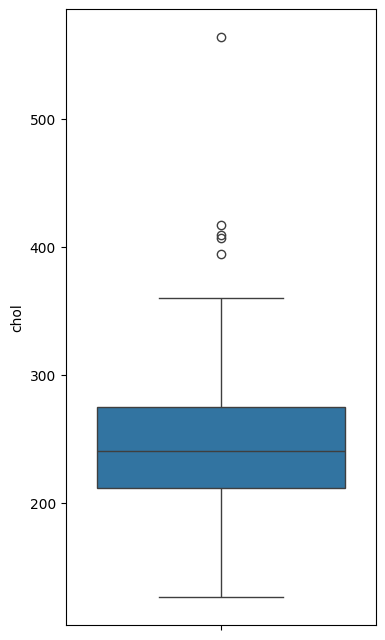

In [20]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol	)

# **Density based Outlier Detection**

**DBSCAN**

In [65]:
X = df_1[['thal','chol']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [66]:
pd.Series(labels).value_counts()

 0    136
-1     71
 1     55
 3     11
 4     11
 5     10
 2      9
dtype: int64

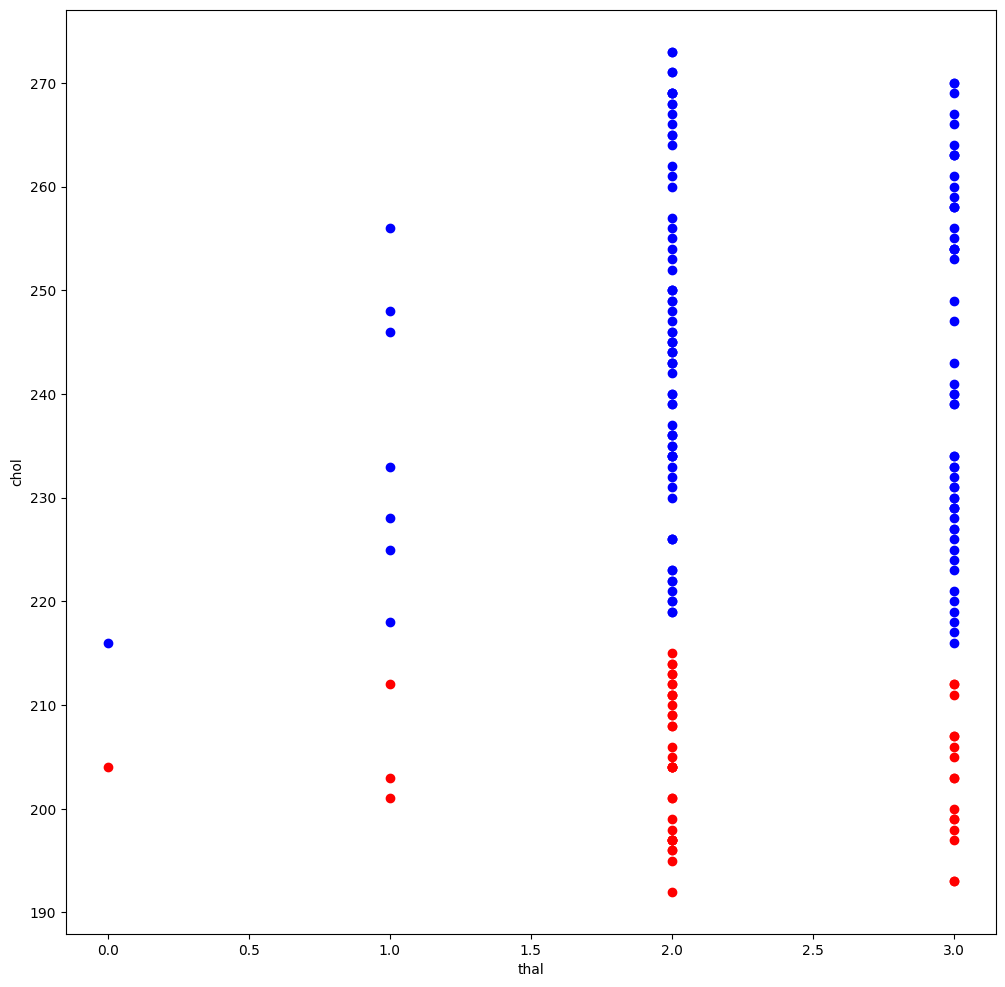

In [67]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('thal');
plt.ylabel('chol');

**Local Outlier Factor**

In [63]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['age','chol']].values
y_pred = clf.fit_predict(X)

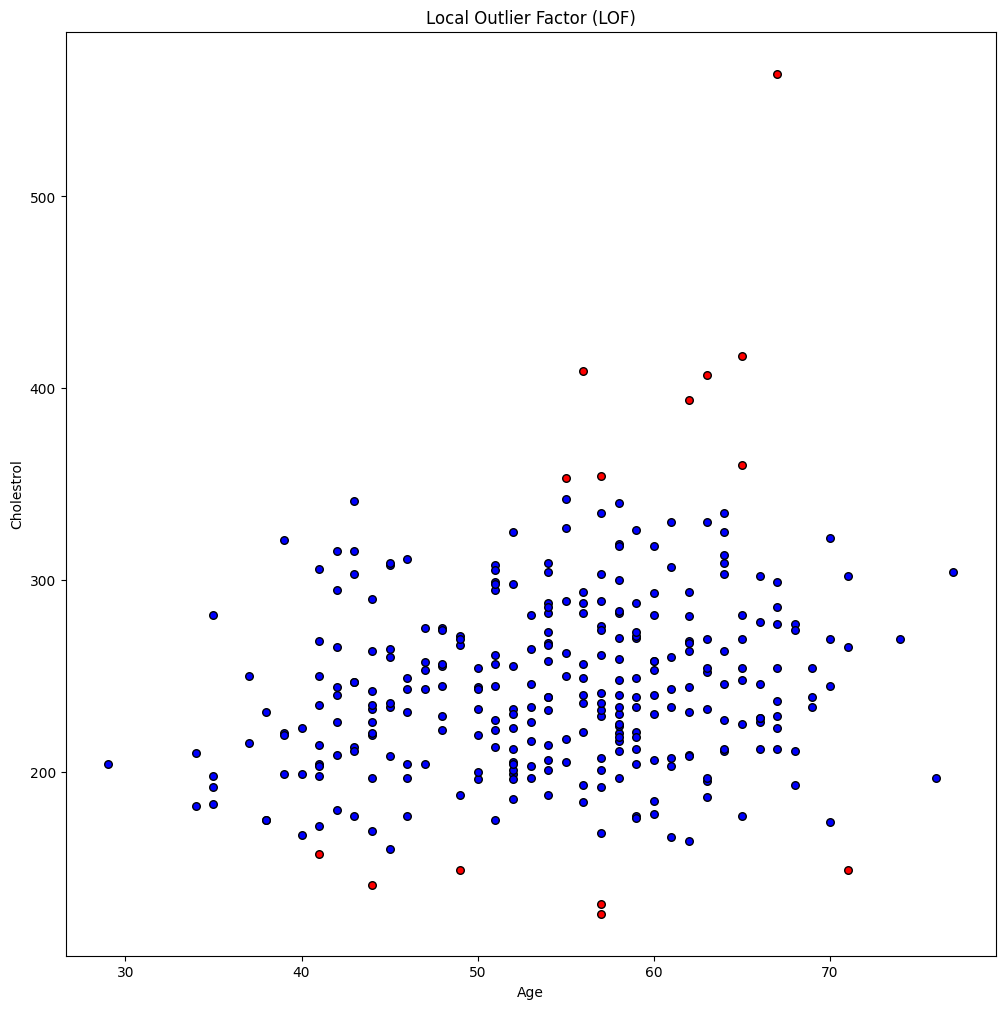

In [64]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

# **Distance based Outlier Detection**

**KNN Outlier Detection**

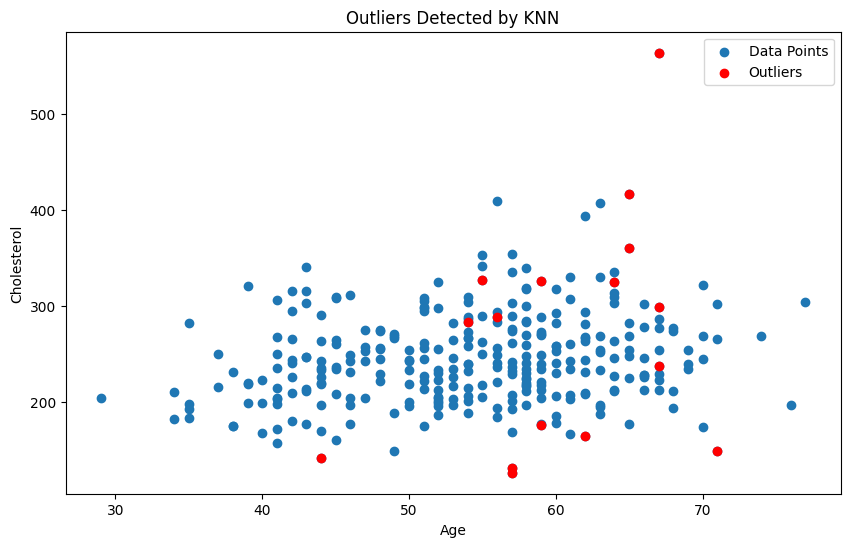

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load your data into a DataFrame
# Assuming your DataFrame is named df

# Select only the numeric columns for outlier detection
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a DataFrame with only numeric columns
numeric_data = df_1[numeric_cols]

# Define the number of neighbors for KNN
k = 5  # You can adjust this parameter

# Initialize the NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto')

# Fit the model to the numeric data
nbrs.fit(numeric_data)

# Compute distances and indices of the k nearest neighbors for each sample
distances, indices = nbrs.kneighbors(numeric_data)

# Compute average distance to k nearest neighbors for each sample
avg_distances = distances.mean(axis=1)

# Set a threshold for outlier detection (e.g., based on percentile)
threshold = np.percentile(avg_distances, 95)  # You can adjust this percentile

# Identify outliers based on the threshold
outliers = df_1[avg_distances > threshold]

# Visualize outliers using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_1['age'], df_1['chol'], label='Data Points')
plt.scatter(outliers['age'], outliers['chol'], color='red', label='Outliers')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Outliers Detected by KNN')
plt.legend()
plt.show()
